# Pinch Analysis Using Pinch_main.py

This notebook demonstrates how to use the `Pinch_main.py` module to perform pinch analysis for process energy optimization. Pinch analysis is a methodology for optimizing energy recovery in chemical processes by identifying the minimum energy requirements and the optimal placement of heat exchangers.

## What is Pinch Analysis?

Pinch analysis helps identify the "pinch point" - the point where the hot and cold composite curves are closest, indicating the minimum temperature difference required for heat transfer. This allows engineers to:

1. Calculate minimum hot and cold utility requirements
2. Identify optimal heat exchanger network design
3. Maximize energy recovery
4. Reduce operating costs

## Prerequisites

Make sure you have the following dependencies installed:
- numpy
- matplotlib
- tabulate
- CoolProp

You can install them using: `pip install numpy matplotlib tabulate CoolProp`

## 1. Import Required Libraries

First, let's import the necessary libraries and ensure we can access the pinch analysis module.

In [4]:
# Import required libraries
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Add the pinch-tool-main directory to the Python path
#sys.path.append('./pinch-tool-main')

# Import the Pinchmain class
from Pinch_main import Pinchmain

print("Libraries imported successfully!")
print(f"Python path includes: {sys.path}")

Libraries imported successfully!
Python path includes: ['/Users/davidzapata/Desktop/Python/anaconda3/envs/http_app/lib/python313.zip', '/Users/davidzapata/Desktop/Python/anaconda3/envs/http_app/lib/python3.13', '/Users/davidzapata/Desktop/Python/anaconda3/envs/http_app/lib/python3.13/lib-dynload', '', '/Users/davidzapata/Desktop/Python/anaconda3/envs/http_app/lib/python3.13/site-packages']


## 2. Understanding the Input CSV Format

The pinch analysis requires stream data in CSV format. Let's examine the example file structure:

**CSV Format:**
- First row: `Tmin,<minimum_approach_temperature>`
- Second row: `CP,TSUPPLY,TTARGET` (headers)
- Subsequent rows: `CP,TSUPPLY,TTARGET` values for each stream

**Stream Types:**
- **HOT streams**: TSUPPLY > TTARGET (streams that need cooling)
- **COLD streams**: TSUPPLY < TTARGET (streams that need heating)

**Parameters:**
- **CP**: Heat capacity flow rate (kW/K)
- **TSUPPLY**: Supply temperature (°C)
- **TTARGET**: Target temperature (°C)
- **Tmin**: Minimum approach temperature (°C)

In [5]:
# Examine the example CSV file
import csv

print("Example CSV file content:")
print("=" * 50)

with open('InputCSVs/Example.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for i, row in enumerate(csv_reader):
        print(f"Row {i+1}: {row}")

print("\n" + "=" * 50)
print("Stream Analysis:")
print("- Tmin = 10°C (minimum approach temperature)")
print("- Row 3: CP=15, TSUPPLY=43°C, TTARGET=23°C → HOT stream (needs cooling)")
print("- Row 4: CP=40, TSUPPLY=103°C, TTARGET=43°C → HOT stream (needs cooling)")
print("- Row 5: CP=15, TSUPPLY=128°C, TTARGET=103°C → HOT stream (needs cooling)")
print("- Row 6: CP=30, TSUPPLY=88°C, TTARGET=113°C → COLD stream (needs heating)")
print("- Row 7: CP=50, TSUPPLY=68°C, TTARGET=88°C → COLD stream (needs heating)")
print("- Row 8: CP=20, TSUPPLY=8°C, TTARGET=68°C → COLD stream (needs heating)")

Example CSV file content:
Row 1: ['Tmin', '10']
Row 2: ['CP', 'TSUPPLY', 'TTARGET']
Row 3: ['15', '43', '23']
Row 4: ['40', '103', '43']
Row 5: ['15', '128', '103']
Row 6: ['30', '88', '113']
Row 7: ['50', '68', '88']
Row 8: ['20', '8', '68']

Stream Analysis:
- Tmin = 10°C (minimum approach temperature)
- Row 3: CP=15, TSUPPLY=43°C, TTARGET=23°C → HOT stream (needs cooling)
- Row 4: CP=40, TSUPPLY=103°C, TTARGET=43°C → HOT stream (needs cooling)
- Row 5: CP=15, TSUPPLY=128°C, TTARGET=103°C → HOT stream (needs cooling)
- Row 6: CP=30, TSUPPLY=88°C, TTARGET=113°C → COLD stream (needs heating)
- Row 7: CP=50, TSUPPLY=68°C, TTARGET=88°C → COLD stream (needs heating)
- Row 8: CP=20, TSUPPLY=8°C, TTARGET=68°C → COLD stream (needs heating)


## 3. Running Pinch Analysis

Now let's run the pinch analysis using the Pinchmain class. We'll use the example CSV file and enable plotting.

Running pinch analysis...
Found example CSV at: InputCSVs/Example.csv
[123.0, 118.0, 98.0, 93.0, 73.0, 38.0, 18.0, 13.0]
{'H': [375.0, 450.0, 150.0, 200.0, 0.0, 700.0, 600.0, 500.0], 'T': [123.0, 118.0, 98.0, 93.0, 73.0, 38.0, 18.0, 13.0]}
[{'deltaH': 75.0, 'exitH': 450.0}, {'deltaH': -300.0, 'exitH': 150.0}, {'deltaH': 50.0, 'exitH': 200.0}, {'deltaH': -200.0, 'exitH': 0.0}, {'deltaH': 700.0, 'exitH': 700.0}, {'deltaH': -100.0, 'exitH': 600.0}, {'deltaH': -100.0, 'exitH': 500.0}]


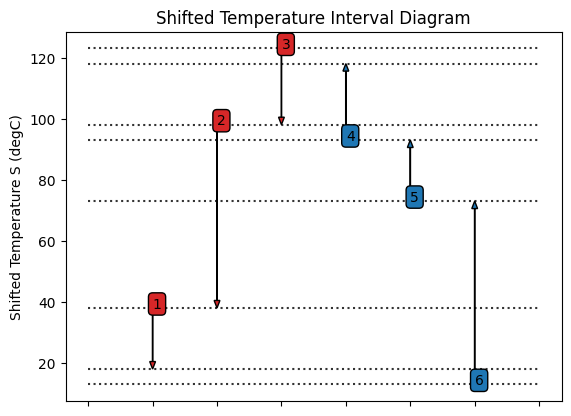

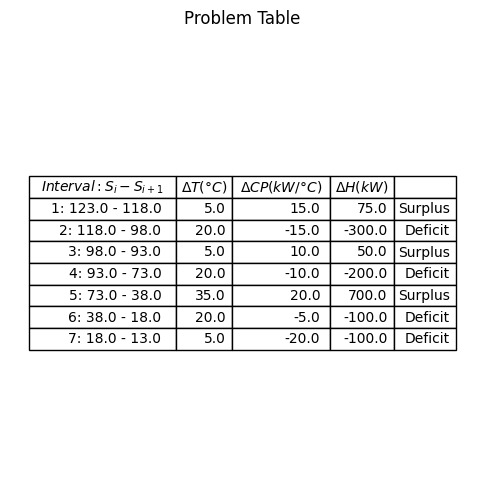

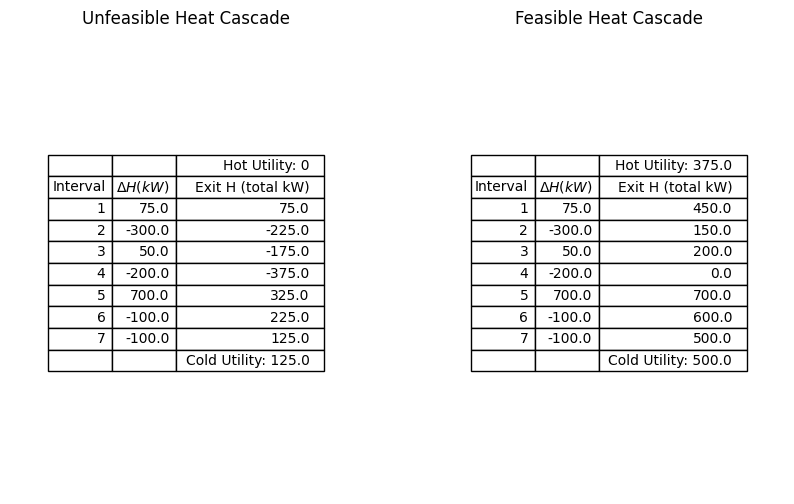

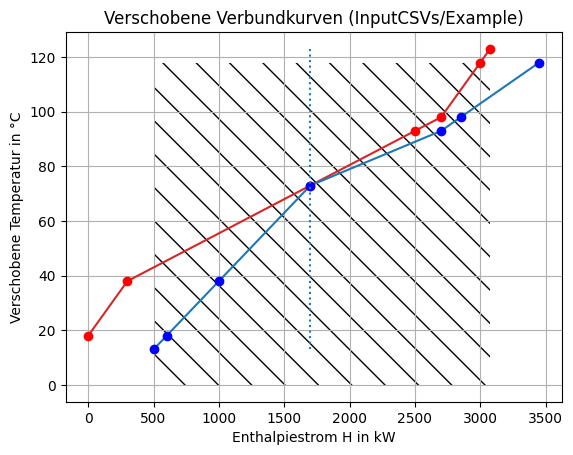

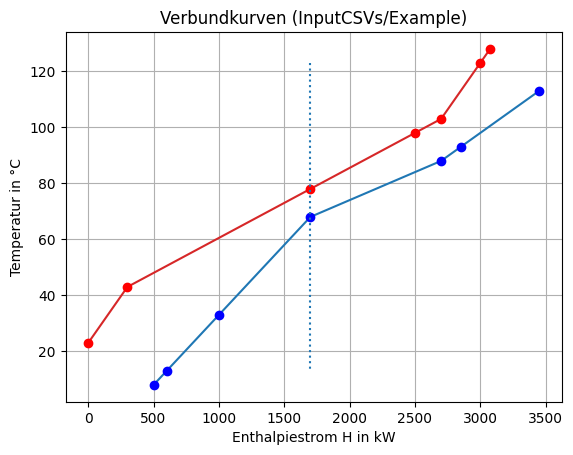

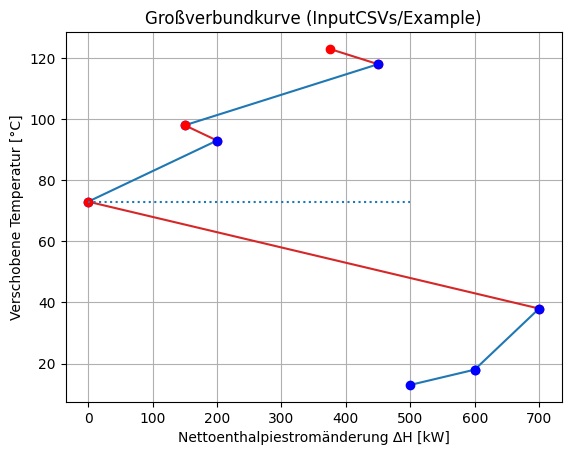

Pinch analysis completed!
Minimum approach temperature (Tmin): 10.0°C
Hot utility requirement: 375.00 kW
Cold utility requirement: 500.00 kW
Pinch temperature: 73.00°C


In [6]:
# Run pinch analysis with plotting enabled
print("Running pinch analysis...")

# Create Pinchmain instance with the example CSV file
# Options: 'draw' enables plotting, 'debug' shows detailed output, 'csv' saves results
csv_name = 'InputCSVs/Example.csv'

# Check if the example file exists
if os.path.exists(csv_name):
    print(f"Found example CSV at: {csv_name}")
else:
    print(f"Example CSV not found at: {csv_name}")
    print("Please ensure the pinch-tool-main directory and InputCSVs folder are present.")

pinch_analysis = Pinchmain(csv_name, options={'draw'})

# Solve the pinch problem
pinch_analysis.solvePinch(localisation='DE')

print("Pinch analysis completed!")
print(f"Minimum approach temperature (Tmin): {pinch_analysis.PinchAnalyse.tmin}°C")
print(f"Hot utility requirement: {pinch_analysis.PinchAnalyse.hotUtility:.2f} kW")
print(f"Cold utility requirement: {pinch_analysis.PinchAnalyse.coldUtility:.2f} kW")
print(f"Pinch temperature: {pinch_analysis.PinchAnalyse.pinchTemperature:.2f}°C")

## 4. Examining the Results

Let's examine the detailed results from the pinch analysis, including the heat cascade and composite curves.

In [7]:
# Examine the results in detail
print("=== PINCH ANALYSIS RESULTS ===")
print(f"Tmin (minimum approach temperature): {pinch_analysis.PinchAnalyse.tmin}°C")
print(f"Hot utility requirement: {pinch_analysis.PinchAnalyse.hotUtility:.2f} kW")
print(f"Cold utility requirement: {pinch_analysis.PinchAnalyse.coldUtility:.2f} kW")
print(f"Pinch temperature: {pinch_analysis.PinchAnalyse.pinchTemperature:.2f}°C")

print("\n=== HEAT CASCADE ===")
print("Temperature (°C) | Heat Load (kW)")
print("-" * 35)
for temp, heat in zip(pinch_analysis.PinchAnalyse._temperatures, pinch_analysis.PinchAnalyse.heatCascade):
    print("12.2f")

print("\n=== STREAM DATA ===")
print("Stream Type | CP (kW/K) | T_supply (°C) | T_target (°C) | Heat Load (kW)")
print("-" * 75)
for stream in pinch_analysis.PinchAnalyse.streams:
    heat_load = stream['cp'] * abs(stream['ts'] - stream['tt'])
    print("8")

print("\n=== COMPOSITE CURVES DATA ===")
print("Hot Composite Curve:")
print("Temperature (°C) | Enthalpy (kW)")
print("-" * 30)
for t, h in zip(pinch_analysis.PinchAnalyse.compositeDiagram['hot']['T'],
                pinch_analysis.PinchAnalyse.compositeDiagram['hot']['H']):
    print("12.2f")

print("\nCold Composite Curve:")
print("Temperature (°C) | Enthalpy (kW)")
print("-" * 30)
for t, h in zip(pinch_analysis.PinchAnalyse.compositeDiagram['cold']['T'],
                pinch_analysis.PinchAnalyse.compositeDiagram['cold']['H']):
    print("12.2f")

=== PINCH ANALYSIS RESULTS ===
Tmin (minimum approach temperature): 10.0°C
Hot utility requirement: 375.00 kW
Cold utility requirement: 500.00 kW
Pinch temperature: 73.00°C

=== HEAT CASCADE ===
Temperature (°C) | Heat Load (kW)
-----------------------------------
12.2f
12.2f
12.2f
12.2f
12.2f
12.2f
12.2f

=== STREAM DATA ===
Stream Type | CP (kW/K) | T_supply (°C) | T_target (°C) | Heat Load (kW)
---------------------------------------------------------------------------
8
8
8
8
8
8

=== COMPOSITE CURVES DATA ===
Hot Composite Curve:
Temperature (°C) | Enthalpy (kW)
------------------------------
12.2f
12.2f
12.2f
12.2f
12.2f
12.2f
12.2f

Cold Composite Curve:
Temperature (°C) | Enthalpy (kW)
------------------------------
12.2f
12.2f
12.2f
12.2f
12.2f
12.2f
12.2f


## 5. Manual Plotting of Composite Curves

If the automatic plotting doesn't work or you want to customize the plots, here's how to manually plot the composite curves.

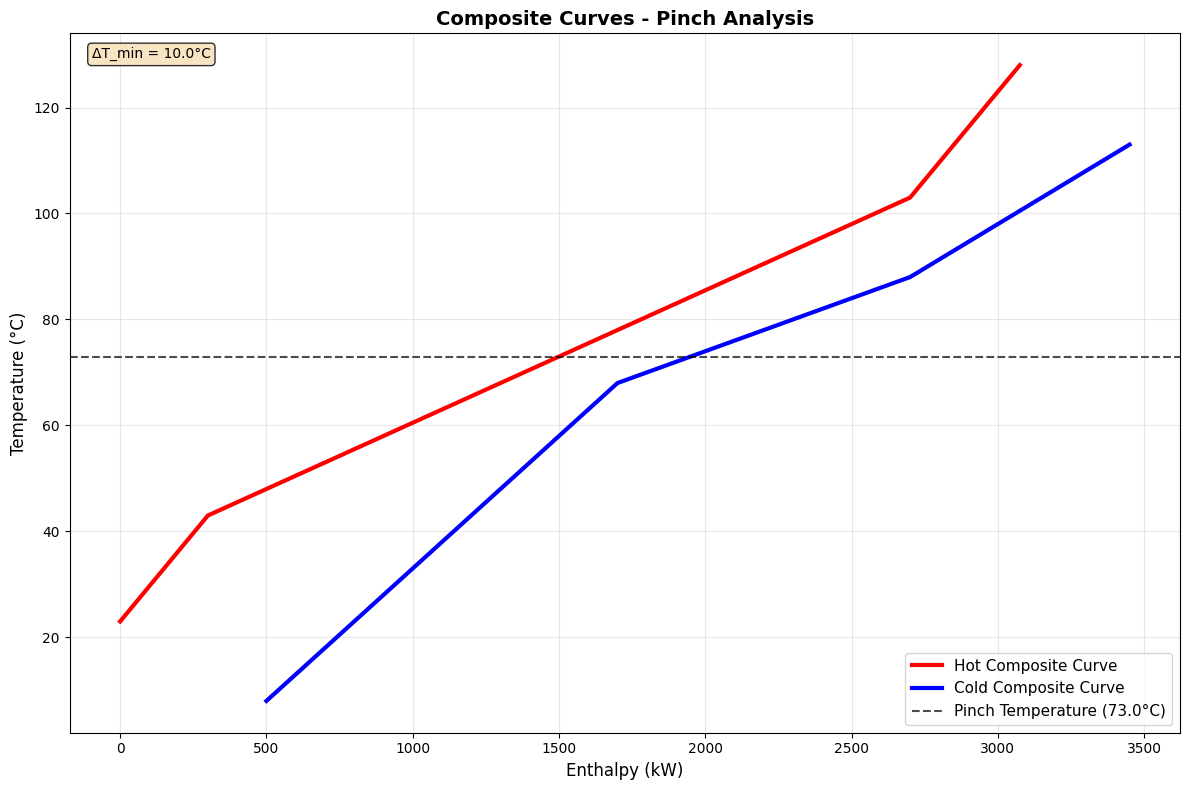

Pinch Temperature: 73.00°C
Hot Utility: 375.00 kW
Cold Utility: 500.00 kW


In [8]:
# Manual plotting of composite curves
plt.figure(figsize=(12, 8))

# Plot hot composite curve
hot_T = pinch_analysis.PinchAnalyse.compositeDiagram['hot']['T']
hot_H = pinch_analysis.PinchAnalyse.compositeDiagram['hot']['H']
plt.plot(hot_H, hot_T, 'r-', linewidth=3, label='Hot Composite Curve')

# Plot cold composite curve
cold_T = pinch_analysis.PinchAnalyse.compositeDiagram['cold']['T']
cold_H = pinch_analysis.PinchAnalyse.compositeDiagram['cold']['H']
plt.plot(cold_H, cold_T, 'b-', linewidth=3, label='Cold Composite Curve')

# Plot pinch point
plt.axhline(y=pinch_analysis.PinchAnalyse.pinchTemperature,
            color='k', linestyle='--', alpha=0.7, label=f'Pinch Temperature ({pinch_analysis.PinchAnalyse.pinchTemperature:.1f}°C)')

# Formatting
plt.xlabel('Enthalpy (kW)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Composite Curves - Pinch Analysis', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show minimum approach temperature
plt.text(0.02, 0.98, f'ΔT_min = {pinch_analysis.PinchAnalyse.tmin}°C',
         transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.show()

print(f"Pinch Temperature: {pinch_analysis.PinchAnalyse.pinchTemperature:.2f}°C")
print(f"Hot Utility: {pinch_analysis.PinchAnalyse.hotUtility:.2f} kW")
print(f"Cold Utility: {pinch_analysis.PinchAnalyse.coldUtility:.2f} kW")

## 6. Creating Custom Stream Data

You can also create your own stream data programmatically and run pinch analysis on it.

In [9]:
# Create custom stream data
import csv

# Define custom streams
custom_streams = [
    ['Tmin', '15'],  # Minimum approach temperature
    ['CP', 'TSUPPLY', 'TTARGET'],  # Headers
    ['25', '150', '50'],   # Hot stream 1: CP=25 kW/K, 150°C → 50°C
    ['30', '120', '40'],   # Hot stream 2: CP=30 kW/K, 120°C → 40°C
    ['20', '200', '100'],  # Hot stream 3: CP=20 kW/K, 200°C → 100°C
    ['35', '30', '80'],    # Cold stream 1: CP=35 kW/K, 30°C → 80°C
    ['40', '20', '90'],    # Cold stream 2: CP=40 kW/K, 20°C → 90°C
    ['15', '10', '70']     # Cold stream 3: CP=15 kW/K, 10°C → 70°C
]

# Write to CSV file (will be copied to InputCSVs folder later)
with open('custom_streams.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(custom_streams)

print("Custom streams CSV created:")
print("=" * 40)
for row in custom_streams:
    print(row)

print("\n" + "=" * 40)
print("Stream Analysis:")
print("- Tmin = 15°C")
print("- 3 HOT streams (need cooling)")
print("- 3 COLD streams (need heating)")
print("- CSV will be copied to pinch-tool-main/InputCSVs/ for analysis")

Custom streams CSV created:
['Tmin', '15']
['CP', 'TSUPPLY', 'TTARGET']
['25', '150', '50']
['30', '120', '40']
['20', '200', '100']
['35', '30', '80']
['40', '20', '90']
['15', '10', '70']

Stream Analysis:
- Tmin = 15°C
- 3 HOT streams (need cooling)
- 3 COLD streams (need heating)
- CSV will be copied to pinch-tool-main/InputCSVs/ for analysis


## 7. Running Analysis on Custom Data

Let's run pinch analysis on our custom stream data.

Running pinch analysis on custom streams...
Copied custom CSV to: InputCSVs/custom_streams.csv
[192.5, 142.5, 112.5, 97.5, 92.5, 87.5, 77.5, 42.5, 37.5, 32.5, 27.5, 17.5]
{'H': [0, 1000.0, 2350.0, 3475.0, 3650.0, 3725.0, 3525.0, 2300.0, 2000.0, 1875.0, 1600.0, 1450.0], 'T': [192.5, 142.5, 112.5, 97.5, 92.5, 87.5, 77.5, 42.5, 37.5, 32.5, 27.5, 17.5]}
[{'deltaH': 1000.0, 'exitH': 1000.0}, {'deltaH': 1350.0, 'exitH': 2350.0}, {'deltaH': 1125.0, 'exitH': 3475.0}, {'deltaH': 175.0, 'exitH': 3650.0}, {'deltaH': 75.0, 'exitH': 3725.0}, {'deltaH': -200.0, 'exitH': 3525.0}, {'deltaH': -1225.0, 'exitH': 2300.0}, {'deltaH': -300.0, 'exitH': 2000.0}, {'deltaH': -125.0, 'exitH': 1875.0}, {'deltaH': -275.0, 'exitH': 1600.0}, {'deltaH': -150.0, 'exitH': 1450.0}]


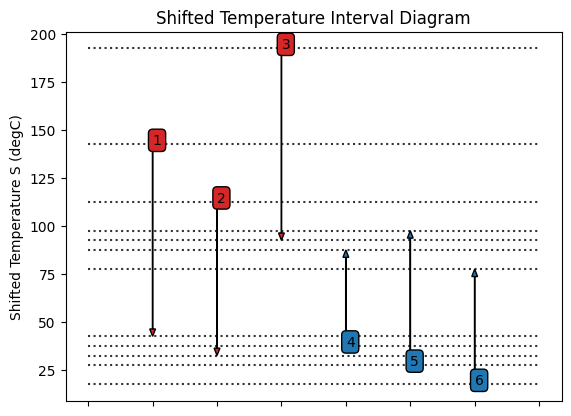

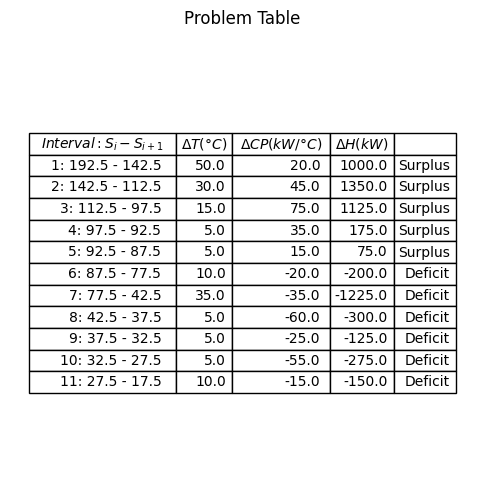

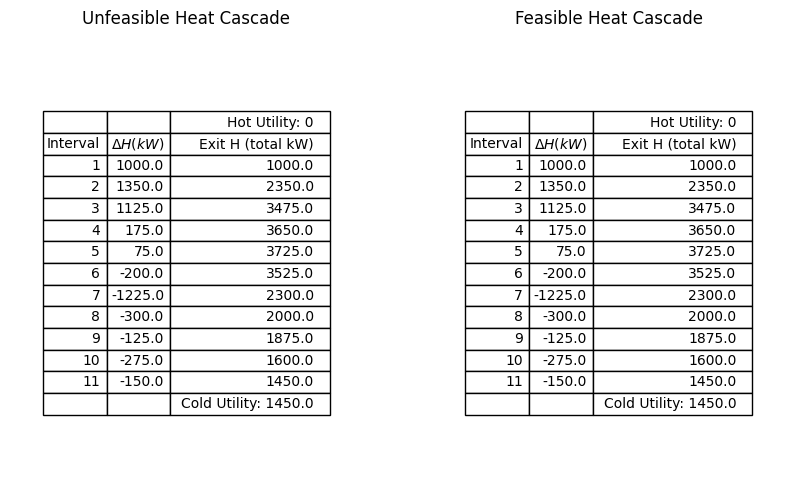

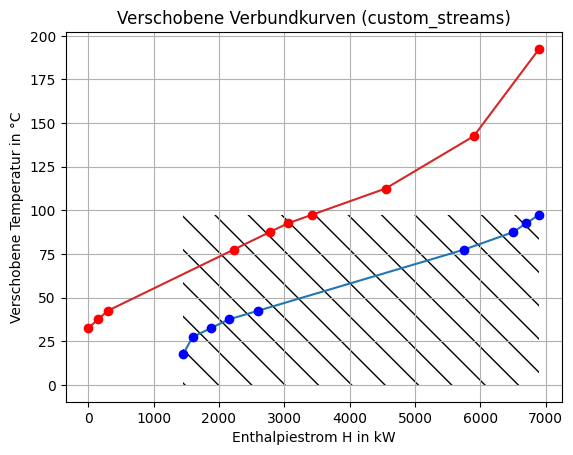

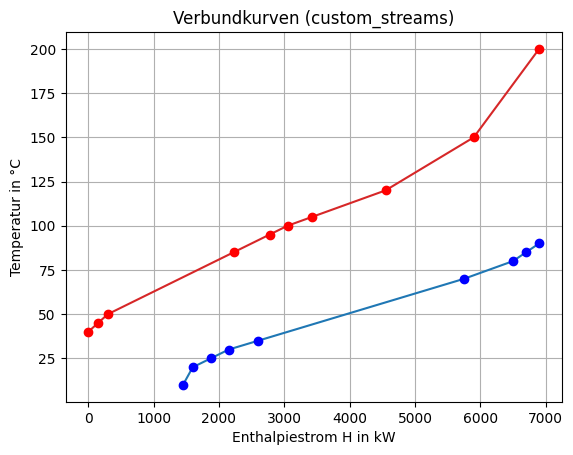

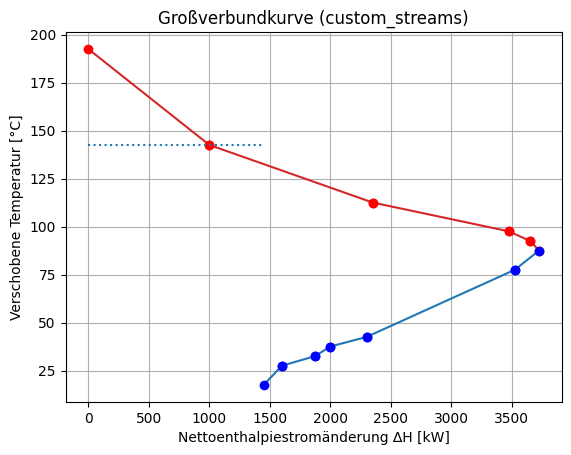

Custom pinch analysis completed!
Minimum approach temperature (Tmin): 15.0°C
Hot utility requirement: 0.00 kW
Cold utility requirement: 1450.00 kW
Pinch temperature: 142.50°C


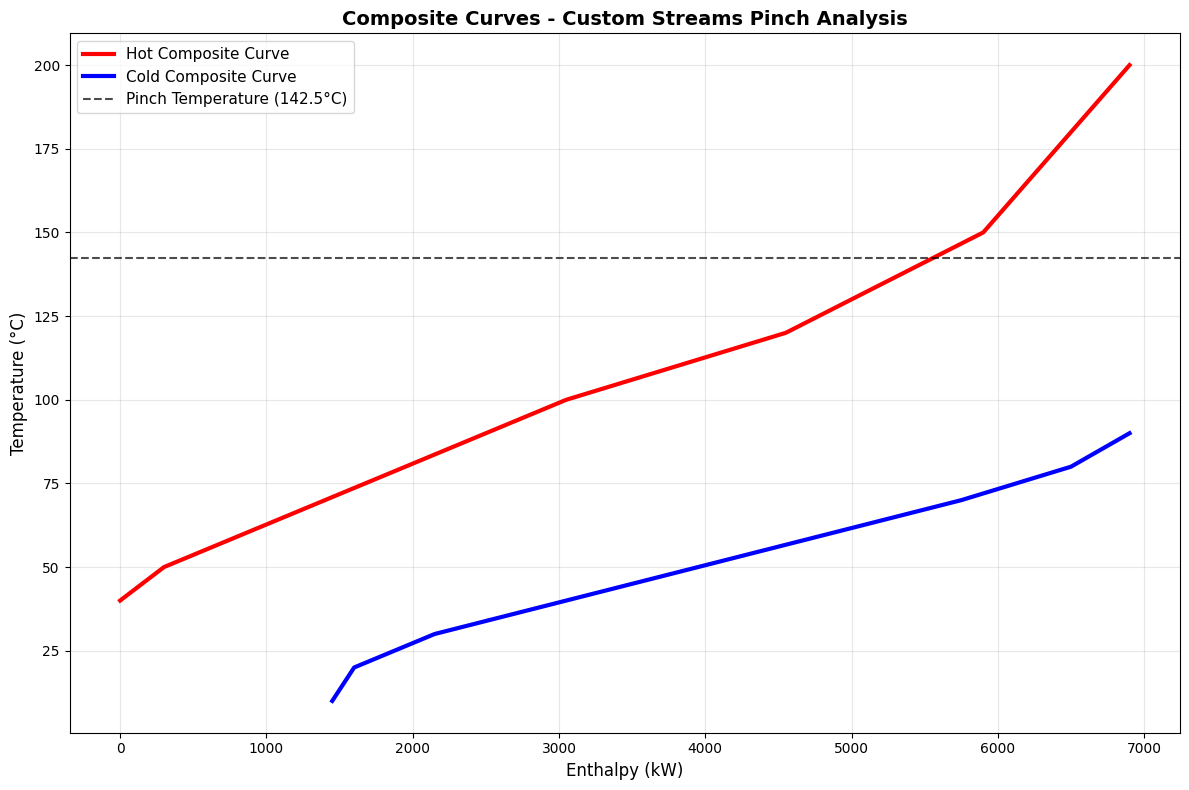

In [10]:
# Run pinch analysis on custom data
print("Running pinch analysis on custom streams...")

# Create Pinchmain instance with custom CSV file
# The custom CSV needs to be in the InputCSVs folder for Pinchmain to find it
custom_csv_path = 'InputCSVs/custom_streams.csv'

# Copy our custom CSV to the expected location
import shutil
if os.path.exists('custom_streams.csv'):
    shutil.copy('custom_streams.csv', custom_csv_path)
    print(f"Copied custom CSV to: {custom_csv_path}")
else:
    print("Custom CSV not found, creating it in the correct location...")
    # Recreate the custom streams directly in the InputCSVs folder
    custom_streams = [
        ['Tmin', '15'],  # Minimum approach temperature
        ['CP', 'TSUPPLY', 'TTARGET'],  # Headers
        ['25', '150', '50'],   # Hot stream 1: CP=25 kW/K, 150°C → 50°C
        ['30', '120', '40'],   # Hot stream 2: CP=30 kW/K, 120°C → 40°C
        ['20', '200', '100'],  # Hot stream 3: CP=20 kW/K, 200°C → 100°C
        ['35', '30', '80'],    # Cold stream 1: CP=35 kW/K, 30°C → 80°C
        ['40', '20', '90'],    # Cold stream 2: CP=40 kW/K, 20°C → 90°C
        ['15', '10', '70']     # Cold stream 3: CP=15 kW/K, 10°C → 70°C
    ]
    with open(custom_csv_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(custom_streams)
    print(f"Created custom CSV at: {custom_csv_path}")

custom_pinch = Pinchmain('custom_streams.csv', options={'draw'})

# Solve the pinch problem
custom_pinch.solvePinch(localisation='DE')

print("Custom pinch analysis completed!")
print(f"Minimum approach temperature (Tmin): {custom_pinch.PinchAnalyse.tmin}°C")
print(f"Hot utility requirement: {custom_pinch.PinchAnalyse.hotUtility:.2f} kW")
print(f"Cold utility requirement: {custom_pinch.PinchAnalyse.coldUtility:.2f} kW")
print(f"Pinch temperature: {custom_pinch.PinchAnalyse.pinchTemperature:.2f}°C")

# Plot the results
plt.figure(figsize=(12, 8))

# Plot hot composite curve
hot_T = custom_pinch.PinchAnalyse.compositeDiagram['hot']['T']
hot_H = custom_pinch.PinchAnalyse.compositeDiagram['hot']['H']
plt.plot(hot_H, hot_T, 'r-', linewidth=3, label='Hot Composite Curve')

# Plot cold composite curve
cold_T = custom_pinch.PinchAnalyse.compositeDiagram['cold']['T']
cold_H = custom_pinch.PinchAnalyse.compositeDiagram['cold']['H']
plt.plot(cold_H, cold_T, 'b-', linewidth=3, label='Cold Composite Curve')

# Plot pinch point
plt.axhline(y=custom_pinch.PinchAnalyse.pinchTemperature,
            color='k', linestyle='--', alpha=0.7,
            label=f'Pinch Temperature ({custom_pinch.PinchAnalyse.pinchTemperature:.1f}°C)')

# Formatting
plt.xlabel('Enthalpy (kW)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Composite Curves - Custom Streams Pinch Analysis', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

In [11]:
# Run pinch analysis on custom data
print("Running pinch analysis on custom streams...")

# Ensure the folder exists
os.makedirs("InputCSVs", exist_ok=True)

custom_csv_path = 'InputCSVs/custom_streams_2.csv'

print("Custom CSV not found, creating it in the correct location...")
# Recreate the custom streams directly in the InputCSVs folder
custom_streams = [
    ['Tmin', '15'],  # Minimum approach temperature
    ['CP', 'TSUPPLY', 'TTARGET'],  # Headers
    ['17.42', '30.69', '180'],   # Hot stream 1
    ['19.68', '75.42', '38.07'], # Hot stream 2
    ['85.3', '75.42', '15'],     # Hot stream 3
]

with open(custom_csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(custom_streams)


Running pinch analysis on custom streams...
Custom CSV not found, creating it in the correct location...


Running pinch analysis on custom streams...
Custom CSV not found, creating it in the correct location...
[187.5, 67.92, 38.19, 30.57, 7.5]
{'H': [2083.0836000000004, 0.0, 2603.1588000000006, 3403.1064, 5370.9774], 'T': [187.5, 67.92, 38.19, 30.57, 7.5]}
[{'deltaH': -2083.0836000000004, 'exitH': 0.0}, {'deltaH': 2603.1588000000006, 'exitH': 2603.1588000000006}, {'deltaH': 799.9475999999996, 'exitH': 3403.1064}, {'deltaH': 1967.8709999999999, 'exitH': 5370.9774}]


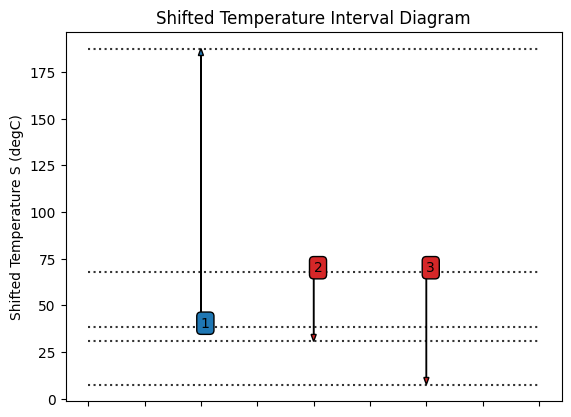

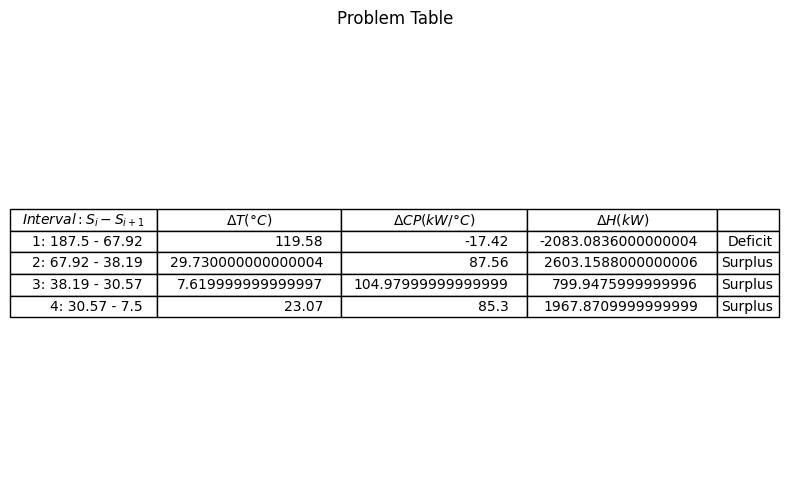

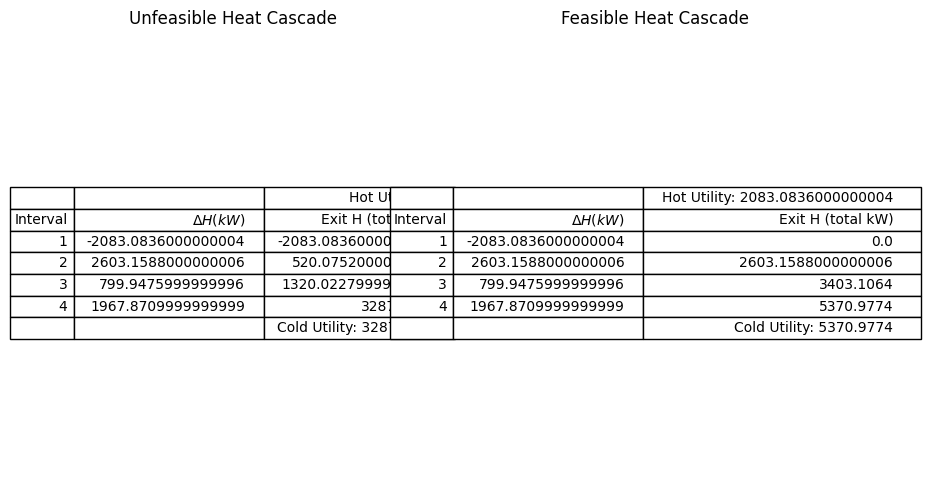

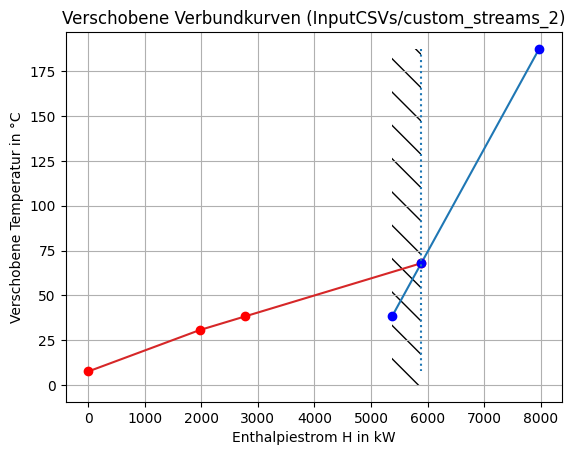

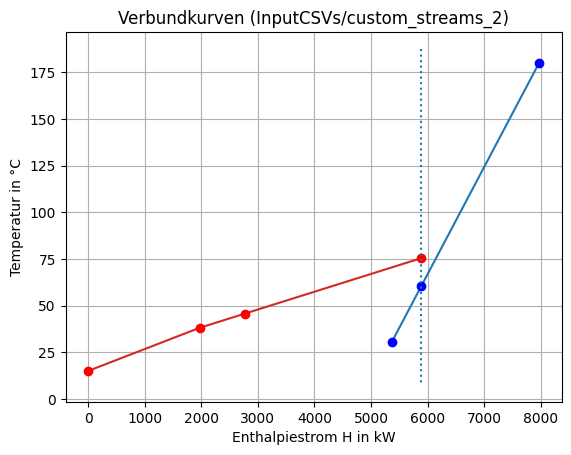

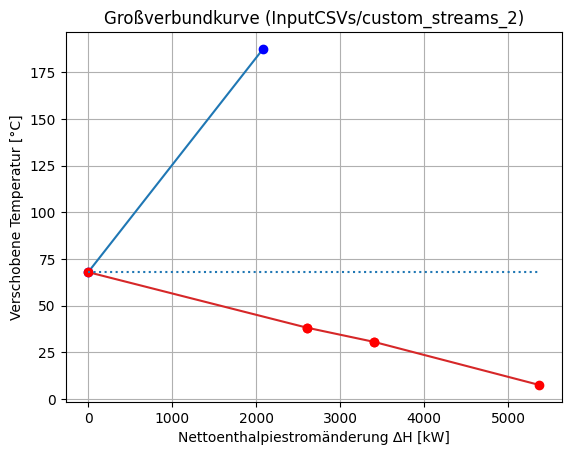

Custom pinch analysis completed!
Minimum approach temperature (Tmin): 15.0°C
Hot utility requirement: 2083.08 kW
Cold utility requirement: 5370.98 kW
Pinch temperature: 67.92°C


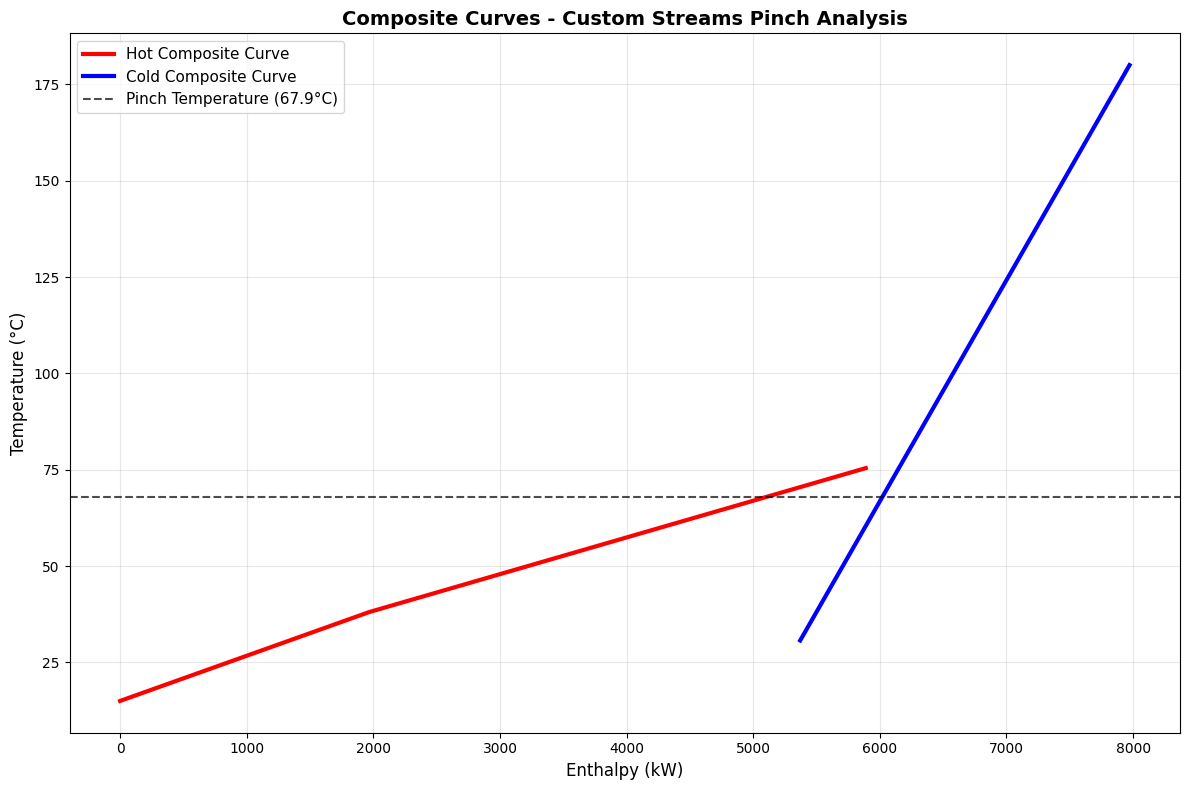

In [12]:
# Run pinch analysis on custom data
print("Running pinch analysis on custom streams...")

# Ensure the folder exists
os.makedirs("InputCSVs", exist_ok=True)

custom_csv_path = 'InputCSVs/custom_streams_2.csv'

print("Custom CSV not found, creating it in the correct location...")
# Recreate the custom streams directly in the InputCSVs folder
custom_streams = [
    ['Tmin', '15'],  # Minimum approach temperature
    ['CP', 'TSUPPLY', 'TTARGET'],  # Headers
    ['17.42', '30.69', '180'],   # Hot stream 1
    ['19.68', '75.42', '38.07'], # Hot stream 2
    ['85.3', '75.42', '15'],     # Hot stream 3
]

with open(custom_csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(custom_streams)

custom_pinch = Pinchmain('InputCSVs/custom_streams_2.csv', options={'draw'})

# Solve the pinch problem
custom_pinch.solvePinch(localisation='DE')

print("Custom pinch analysis completed!")
print(f"Minimum approach temperature (Tmin): {custom_pinch.PinchAnalyse.tmin}°C")
print(f"Hot utility requirement: {custom_pinch.PinchAnalyse.hotUtility:.2f} kW")
print(f"Cold utility requirement: {custom_pinch.PinchAnalyse.coldUtility:.2f} kW")
print(f"Pinch temperature: {custom_pinch.PinchAnalyse.pinchTemperature:.2f}°C")

# Plot the results
plt.figure(figsize=(12, 8))

# Plot hot composite curve
hot_T = custom_pinch.PinchAnalyse.compositeDiagram['hot']['T']
hot_H = custom_pinch.PinchAnalyse.compositeDiagram['hot']['H']
plt.plot(hot_H, hot_T, 'r-', linewidth=3, label='Hot Composite Curve')

# Plot cold composite curve
cold_T = custom_pinch.PinchAnalyse.compositeDiagram['cold']['T']
cold_H = custom_pinch.PinchAnalyse.compositeDiagram['cold']['H']
plt.plot(cold_H, cold_T, 'b-', linewidth=3, label='Cold Composite Curve')

# Plot pinch point
plt.axhline(y=custom_pinch.PinchAnalyse.pinchTemperature,
            color='k', linestyle='--', alpha=0.7,
            label=f'Pinch Temperature ({custom_pinch.PinchAnalyse.pinchTemperature:.1f}°C)')

# Formatting
plt.xlabel('Enthalpy (kW)', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.title('Composite Curves - Custom Streams Pinch Analysis', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

In [19]:
from Pinch_main import Pinchmain
from Modules.HeatPumpIntegration.HeatPumpIntegration import HeatPumpIntegration as HPI

[123.0, 118.0, 98.0, 93.0, 73.0, 38.0, 18.0, 13.0]
{'H': [375.0, 450.0, 150.0, 200.0, 0.0, 700.0, 600.0, 500.0], 'T': [123.0, 118.0, 98.0, 93.0, 73.0, 38.0, 18.0, 13.0]}
[{'deltaH': 75.0, 'exitH': 450.0}, {'deltaH': -300.0, 'exitH': 150.0}, {'deltaH': 50.0, 'exitH': 200.0}, {'deltaH': -200.0, 'exitH': 0.0}, {'deltaH': 700.0, 'exitH': 700.0}, {'deltaH': -100.0, 'exitH': 600.0}, {'deltaH': -100.0, 'exitH': 500.0}]
  COP    QQuelle    QSenke
-----  ---------  --------
3.855         50        68
{'COP': 3.175, 'QQuelle': 258, 'QSenke': 376}


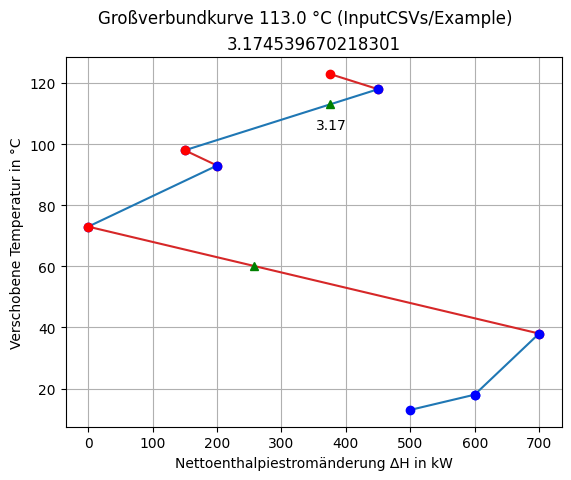

In [27]:
from Pinch_main import Pinchmain
from Modules.HeatPumpIntegration.HeatPumpIntegration import HeatPumpIntegration as HPI
import matplotlib.pyplot as plt

class HPImain():
    def __init__(self, streamsDataFile, TS = None):
        self.pyPinchHPI = Pinchmain(streamsDataFile, options= {})
        self.HPI = HPI(streamsDataFile, TS, self.pyPinchHPI)
    def showHPI(self):
        self.HPI.HPI()
        plt.show()

HPImain('InputCSVs/Example.csv').showHPI()

### Heat Pump Integration with Custom Temperature

You can also specify a target supply temperature (TS) for the heat pump to analyze specific integration scenarios.

## 9. Heat Pump Integration (HPI)

Heat Pump Integration is an advanced technique to further reduce utility requirements by integrating heat pumps into the process. Heat pumps can transfer heat from below the pinch to above the pinch, reducing both hot and cold utility needs.

The `HPI_main.py` module analyzes the potential for heat pump integration and visualizes the opportunities.

## 8. Summary and Key Insights

### What We've Learned

1. **Pinch Analysis Basics**: Pinch analysis identifies the minimum energy requirements for a process by finding the "pinch point" where hot and cold composite curves are closest.

2. **Key Results**:
   - **Pinch Temperature**: The temperature at which the minimum approach temperature occurs
   - **Hot Utility**: External heating required above the pinch
   - **Cold Utility**: External cooling required below the pinch

3. **Practical Applications**:
   - **Energy Optimization**: Reduce utility consumption by maximizing heat recovery
   - **Process Design**: Guide the placement of heat exchangers
   - **Cost Savings**: Identify opportunities for energy efficiency improvements

### Key Pinch Analysis Rules

1. **Above the pinch**: Only place heat exchangers between hot streams and cold utilities
2. **Below the pinch**: Only place heat exchangers between cold streams and hot utilities
3. **At the pinch**: No heat transfer across the pinch point

### Options Available

- `'draw'`: Enable automatic plotting of results
- `'debug'`: Show detailed calculation steps
- `'csv'`: Save results to CSV files

### Next Steps

- Experiment with different minimum approach temperatures (Tmin)
- Try different stream configurations
- Analyze real process data
- Integrate with heat exchanger network design

This notebook provides a foundation for using pinch analysis in process engineering applications!